In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [308]:
df=pd.read_csv('F:\\train.csv')
df=df.drop('date_time',1)
df=df.drop('is_holiday',1)
test=pd.read_csv('F:\\test.csv')
test=test.drop('is_holiday',1)
date=test['date_time']
test=test.drop('date_time',1)
df.head()

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [309]:
df['wind_direction']=df['wind_direction']/100
df['temperature']=df['temperature']/100
test['wind_direction']=test['wind_direction']/100
test['temperature']=test['temperature']/100

In [310]:
df['air_pollution_index']=df['air_pollution_index']/100
test['air_pollution_index']=test['air_pollution_index']/100
df['humidity']=df['humidity']/100
test['humidity']=test['humidity']/100
df['clouds_all']=df['clouds_all']/100
test['clouds_all']=test['clouds_all']/100

In [311]:
df['weather_type'].value_counts()

Clouds          11213
Clear            9233
Mist             4047
Rain             3940
Snow             2070
Drizzle          1204
Haze              902
Fog               567
Thunderstorm      553
Smoke              17
Squall              4
Name: weather_type, dtype: int64

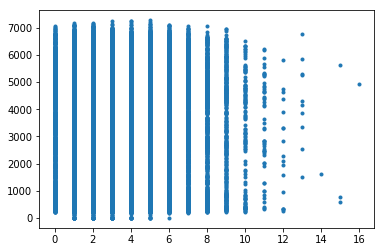

In [312]:
plt.scatter(df['wind_speed'],df['traffic_volume'],marker='.')

In [313]:
df=df[df['temperature']>0]
df=df[df['rain_p_h']<2000]

In [314]:
df.shape

(33739, 13)

In [315]:
test.shape

(14454, 12)

In [316]:
weather_type_dummy=pd.get_dummies(df['weather_type'])
df=df.join(weather_type_dummy)
weather_type_dummy_test=pd.get_dummies(test['weather_type'])
test=test.join(weather_type_dummy_test)

In [317]:
df['weather_description']=df['weather_description'].str.replace('[^a-zA-Z]',' ')
test['weather_description']=test['weather_description'].str.replace('[^a-zA-Z]',' ')

In [318]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(stop_words='english',max_features=20)
tf.fit(df['weather_description'])
df_tf=pd.DataFrame(tf.transform(df['weather_description']).toarray(),columns=tf.get_feature_names()).add_prefix('tfidf_')
df=df.join(df_tf)

In [319]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(stop_words='english',max_features=20)
tf.fit(test['weather_description'])
test_tf=pd.DataFrame(tf.transform(test['weather_description']).toarray(),columns=tf.get_feature_names()).add_prefix('tfidf_')
test=test.join(test_tf)

In [320]:
df=df.drop(['weather_description','Squall','weather_type'],1)
test=test.drop(['weather_description','weather_type'],1)
df=df.dropna()

In [321]:
df.shape

(33728, 41)

In [322]:
test.shape


(14454, 40)

In [323]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.preprocessing import scale

In [324]:
x=df.drop('traffic_volume',1)
y=df['traffic_volume']

In [347]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)

In [348]:
df.head()

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,...,tfidf_moderate,tfidf_overcast,tfidf_proximity,tfidf_rain,tfidf_scattered,tfidf_shower,tfidf_sky,tfidf_smoke,tfidf_snow,tfidf_thunderstorm
0,1.21,0.89,2,3.29,1,1,2.8828,0.0,0.0,0.40,...,0.0,0.00000,0.0,0.0,0.868839,0.0,0.0,0.0,0.0,0.0
1,1.78,0.67,3,3.30,1,1,2.8936,0.0,0.0,0.75,...,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,1.13,0.66,3,3.29,2,2,2.8958,0.0,0.0,0.90,...,0.0,0.83098,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.20,0.66,3,3.29,5,5,2.9013,0.0,0.0,0.90,...,0.0,0.83098,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,2.81,0.65,3,3.29,7,7,2.9114,0.0,0.0,0.75,...,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [349]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor(n_estimators=150,max_depth=4,subsample=0.9)
gb.fit(x_train,y_train)
y_gb=gb.predict(x_test)
np.sqrt(mean_squared_error(y_gb,y_test))

1909.5937592399414

In [350]:
lasso=Lasso()
lasso.fit(x_train,y_train)
y_lasso=lasso.predict(x_test)
np.sqrt(mean_squared_error(y_lasso,y_test))

1966.5326768431523

In [351]:
bag=BaggingRegressor(n_estimators=10)
bag.fit(x_train,y_train)
y_bag=bag.predict(x_test)
np.sqrt(mean_squared_error(y_bag,y_test))

1890.7950833592975

In [356]:
y_test=gb.predict(test)

In [357]:
sub=pd.DataFrame(y_test)
sub.columns=['traffic_volume']
sub['date_time']=date
sub=sub[['date_time','traffic_volume']]

In [358]:
sub.to_csv('F:\\answer.csv',index=False)

In [359]:
sub

,date_time,traffic_volume
0,2017-05-18 00:00:00,3135.342037
1,2017-05-18 00:00:00,3306.601226
2,2017-05-18 00:00:00,3076.482394
3,2017-05-18 01:00:00,3195.799731
4,2017-05-18 01:00:00,3306.484522
5,2017-05-18 02:00:00,3190.942069
6,2017-05-18 02:00:00,3271.296929
7,2017-05-18 02:00:00,2866.432050
8,2017-05-18 03:00:00,3104.008609
9,2017-05-18 03:00:00,3306.736092
